## Observations and Insights 

In [67]:
# Analysis 1: Capomulin and Ramicane are two most promising treatment drug as they have smallest mean Tumour Volume
# Analysis 2: Results are trustable for Capomulin and Ramicane as they were tested most and had the evenly disturbted male and female mouse distrubution
# Analysis 3: Correation and regression of Capomulin also support the results of Capomulin is good to step into next stage of development

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
dataset_complete = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
dataset_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [68]:
# Checking the number of mice.
dataset_complete['Mouse ID'].nunique()

249

In [69]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=dataset_complete[dataset_complete.duplicated(['Mouse ID','Timepoint'])]
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [70]:
# Optional: Get all the data for the duplicate mouse ID. 
g989=dataset_complete.loc[dataset_complete['Mouse ID']=='g989']
g989


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [71]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_date=dataset_complete.drop_duplicates(subset=['Mouse ID','Timepoint'])
clean_date

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [72]:
# Checking the number of mice in the clean DataFrame.
clean_date.count()

Mouse ID               1888
Drug Regimen           1888
Sex                    1888
Age_months             1888
Weight (g)             1888
Timepoint              1888
Tumour Volume (mm3)    1888
Metastatic Sites       1888
dtype: int64

## Summary Statistics

In [73]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.
drug_regimen=clean_date.groupby(['Drug Regimen'])
mean_drug=drug_regimen['Tumour Volume (mm3)'].mean()
median_drug=drug_regimen['Tumour Volume (mm3)'].median()
var_drug=drug_regimen['Tumour Volume (mm3)'].var()
stdvar_drug=drug_regimen['Tumour Volume (mm3)'].std()
sem_drug=drug_regimen['Tumour Volume (mm3)'].sem()
Summary_drug=pd.DataFrame({'Mean Tumour Volume(mm3)':mean_drug,
                           'Median Tumour Volume(mm3)':median_drug,
                           'Variance Tumour Volume(mm3)':var_drug,
                           'Standard Variance Tumour Volume(mm3)':stdvar_drug,
                           'SEM Tumour Volume(mm3)':sem_drug})
Summary_drug



,Mean Tumour Volume(mm3),Median Tumour Volume(mm3),Variance Tumour Volume(mm3),Standard Variance Tumour Volume(mm3),SEM Tumour Volume(mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [74]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen2=drug_regimen['Tumour Volume (mm3)'].agg(['mean','median','var','std','sem'])
drug_regimen2=drug_regimen2.rename(columns={'mean':'Mean Tumour Volume(mm3)',
                                    'median':'Median Tumour Volume(mm3)',
                                    'var':'Variance Tumour Volume(mm3)',
                                    'std':'Standard Variance Tumour Volume(mm3)',
                                    'sem':'SEM Tumour Volume(mm3)'})
drug_regimen2

,Mean Tumour Volume(mm3),Median Tumour Volume(mm3),Variance Tumour Volume(mm3),Standard Variance Tumour Volume(mm3),SEM Tumour Volume(mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Total Mice')

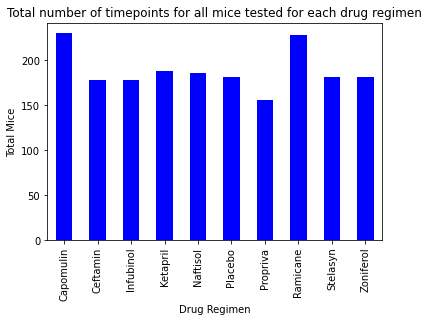

In [75]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen3 = drug_regimen['Mouse ID'].count()
drug_regimen3_Bar= drug_regimen3.plot.bar(x='Drug Regimen',y='Total Mice', title='Total number of timepoints for all mice tested for each drug regimen',color='blue')
plt.ylabel('Total Mice')


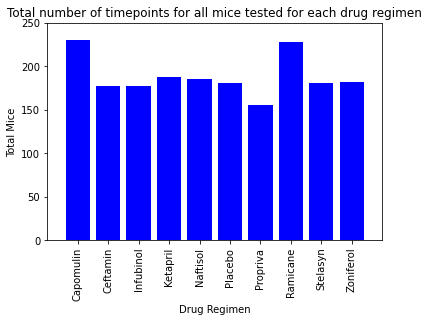

In [76]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(drug_regimen))
drug_regimen4= ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
tick_location = [value for value in x_axis]
plt.bar(x_axis,drug_regimen3,color='b', align='center')
plt.xticks(tick_location,drug_regimen4,rotation=90)
plt.xlim(-1,10)
plt.ylim(0,250)
plt.xlabel('Drug Regimen')
plt.ylabel('Total Mice')
plt.title('Total number of timepoints for all mice tested for each drug regimen')
plt.show()



<AxesSubplot:title={'center':'Distribution of female versus male mice'}, ylabel='Mouse ID'>

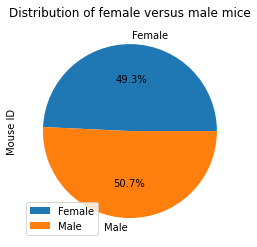

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex=clean_date.groupby('Sex').count()
mice_pie=mice_sex.plot.pie(y='Mouse ID',title='Distribution of female versus male mice',autopct='%1.1f%%')
mice_pie.legend(loc="lower left")
mice_pie



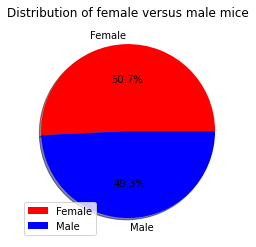

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex2=clean_date['Sex'].value_counts()
label=['Female','Male']
lst_colour=['Red','Blue']
explodes=(0,0)

plt.pie(mice_sex2,explode=explodes,labels=label,colors=lst_colour,autopct='%1.1f%%',shadow=True)
plt.title('Distribution of female versus male mice')
plt.legend(label,loc='lower left')
plt.show()


## Quartiles, Outliers and Boxplots

In [79]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint=clean_date.groupby(['Mouse ID'])['Timepoint'].max()
last_timepoint 

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
tumor_volume = pd.merge(last_timepoint , clean_date, on=(["Mouse ID","Timepoint"]))
tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [80]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumour vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumour volumes
    treatment_regimen = tumor_volume.loc[tumor_volume['Drug Regimen'] == treatment,'Tumour Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(treatment_regimen)

    # Determine outliers using upper and lower bounds
    quartiles = treatment_regimen.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = treatment_regimen.loc[(treatment_regimen < lower_bound) | (treatment_regimen > upper_bound)]

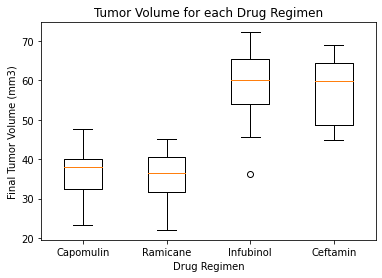

In [81]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
fig1,ax1 = plt.subplots()
ax1.boxplot(tumor_vol_data,labels=treatments)
ax1.set_title('Tumor Volume for each Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

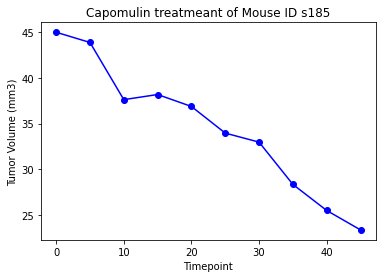

In [82]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
capomulin_mice = clean_date.loc[clean_date['Drug Regimen'] == 'Capomulin']
capomulin_mice

s185 = capomulin_mice.loc[capomulin_mice['Mouse ID'] == 's185']
s185

s185_x_axis = s185['Timepoint']
s185_tumor_volume = s185['Tumour Volume (mm3)']

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of Mouse ID s185')
plt.plot(s185_x_axis,s185_tumor_volume,marker="o",color="blue")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

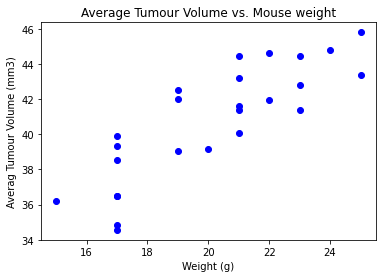

In [83]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
Capomulin_regimen = capomulin_mice.groupby(['Mouse ID']).mean()
plt.scatter(Capomulin_regimen['Weight (g)'],Capomulin_regimen['Tumour Volume (mm3)'],color="b")
plt.title('Average Tumour Volume vs. Mouse weight')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumour Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation for mouse weight and average tumour volume for Capomulin regimen is: 0.84


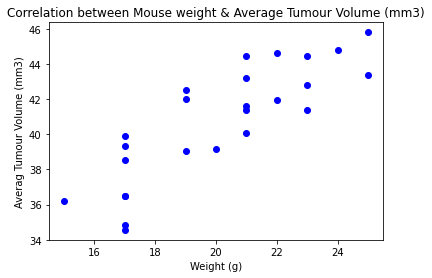

y = 0.95x + 21.55


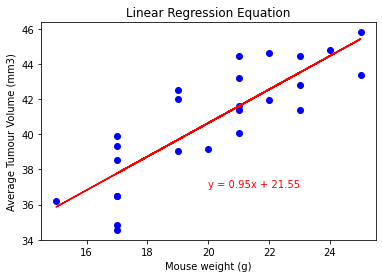

In [84]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
correlation = round(st.pearsonr(Capomulin_regimen['Weight (g)'],Capomulin_regimen['Tumour Volume (mm3)'])[0],2)
print(f'The correlation for mouse weight and average tumour volume for Capomulin regimen is: {correlation}')

plt.scatter(Capomulin_regimen['Weight (g)'],Capomulin_regimen['Tumour Volume (mm3)'],color='b')
plt.title('Correlation between Mouse weight & Average Tumour Volume (mm3)')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumour Volume (mm3)')

plt.show()

x_values = Capomulin_regimen['Weight (g)']
y_values = Capomulin_regimen['Tumour Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values, color='b')
plt.plot(x_values,regress_values,'r-')
plt.title('Linear Regression Equation')
plt.xlabel('Mouse weight (g)')
plt.ylabel('Average Tumour Volume (mm3)')
plt.annotate(line_eq, (20,37),color='r')

plt.show()
